In [1]:
import assessmentModule
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [3]:
home_dir = '/home/todd/code'
data_dir = os.path.join(home_dir,
                        'AnalysisTools/DataScience/data/adam_alter/20151216')
os.chdir(data_dir)

In [4]:
def smooth(x, n):
    """Return moving average for period n."""
    w = np.ones((n, )) / n
    return np.convolve(x, w, mode='valid')

In [5]:
column_names_non_calf = ['c0', 'c1', 'c2', 'c3', 'ts',
                        'c5', 'c6', 'HR', 'c8', 'c9',
                        'SmO2', 'c11', 'c12', 'power', 'c14']

In [6]:
column_names_calf = ['c0', 'c1', 'c2', 'c3', 'ts',
                     'c5', 'c6', 'HR', 'c8', 'c9',
                     'SmO2', 'c11', 'c12', 'power', 'c14',
                     'c15', 'c16', 'c17']

In [7]:
right_forearm = pd.read_csv('right_forearm_LT_20151216.csv', skiprows=5, names=column_names_non_calf)
left_wrist = pd.read_csv('left_wrist_LT_20151216.csv', skiprows=5, names=column_names_non_calf)
back = pd.read_csv('back_LT_20151216.csv', skiprows=5, names=column_names_calf)
chest = pd.read_csv('chest_LT_20151216.csv', skiprows=5, names=column_names_non_calf)
left_calf = pd.read_csv('left_calf_LT_20151216.csv', skiprows=5, names=column_names_non_calf)

In [8]:
data = {}
data['forearm'] = right_forearm
data['wrist'] = left_wrist
data['back'] = back
data['chest'] = chest
data['calf'] = left_calf

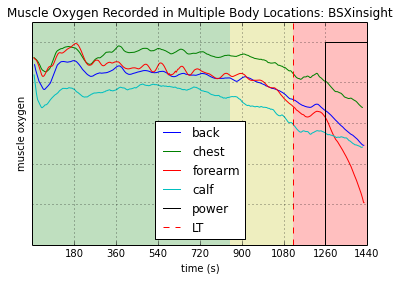

In [9]:
power_range = np.array([120, 200, 220, 240, 260, 280, 300, 320])
for i in ['back', 'chest', 'forearm', 'calf']:
    ts = data[i]['SmO2']
    plt.plot(smooth(ts, 30) / ts.max(), label=i)
plt.grid()
plt.title('Muscle Oxygen Recorded in Multiple Body Locations: BSXinsight')
plt.ylabel('muscle oxygen')
plt.xlabel('time (s)')
plt.tick_params(axis='y',
                which='both',
                left='off',
                right='off',
                labelleft='off')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['legend.loc'] = 'lower center'
plt.xlim(xmin=0, xmax=1440)
plt.ylim(ymin=0.5, ymax=1.05)
plt.xticks(np.arange(180, 1441, 180))
plt.step(np.arange(180, 1551, 180),
         power_range / 320,
         color='black',
         linestyle='solid',
         label='power')
plt.axvspan(0, 851, color='g', alpha=0.25, linewidth=0)
plt.axvspan(851, 1120, color='y', alpha=0.25, linewidth=0)
plt.axvspan(1120, 1440, color='r', alpha=0.25, linewidth=0)
plt.axvline(x=1120, color='r',
            linestyle='dashed', label='LT')
plt.legend()
plt.show()  # Have a look at the data. Turn off when using savefig.
#plt.savefig('SmO2_multiple_locations.png')  # Turn off when using show.

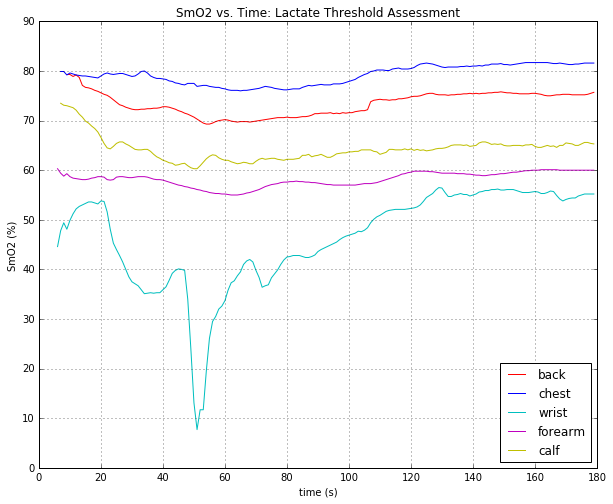

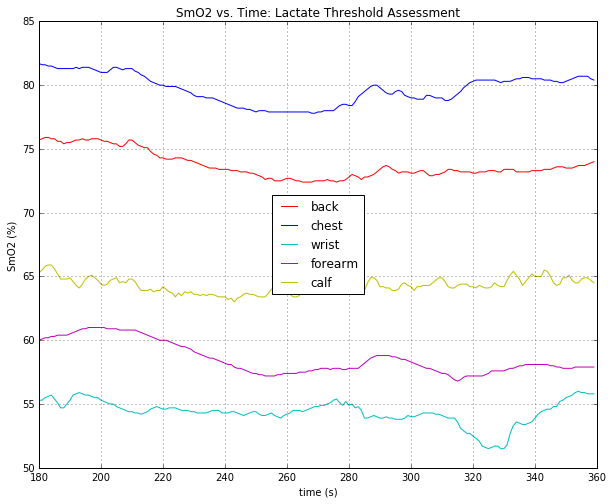

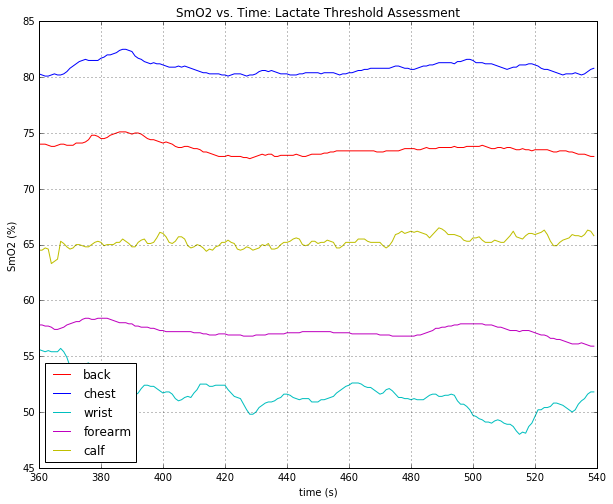

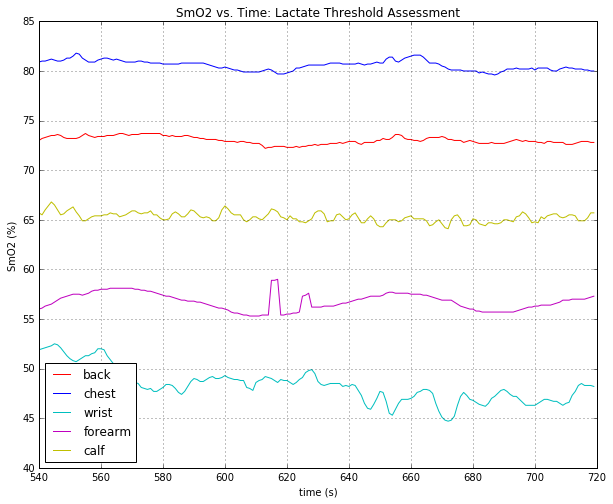

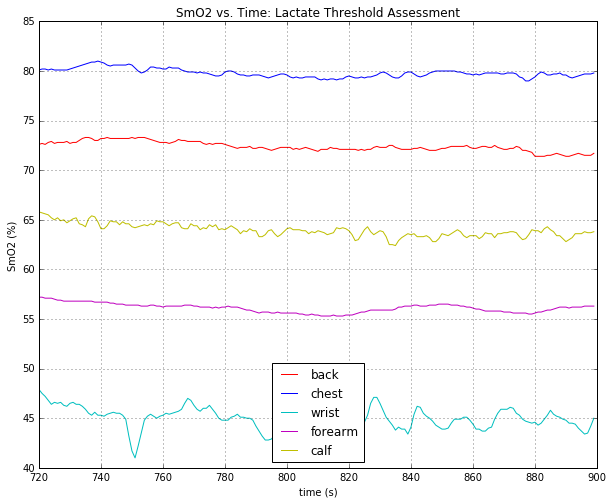

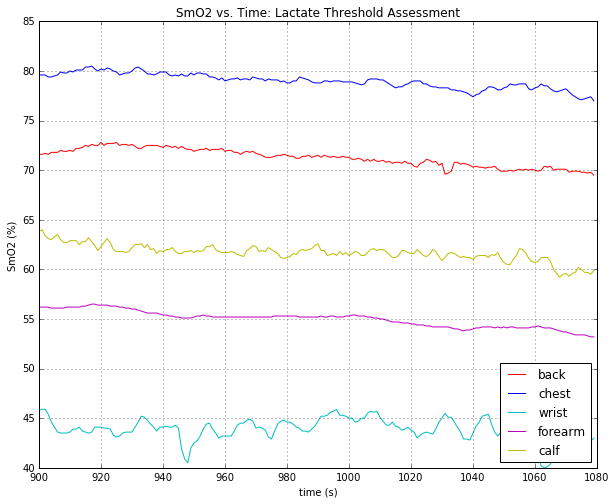

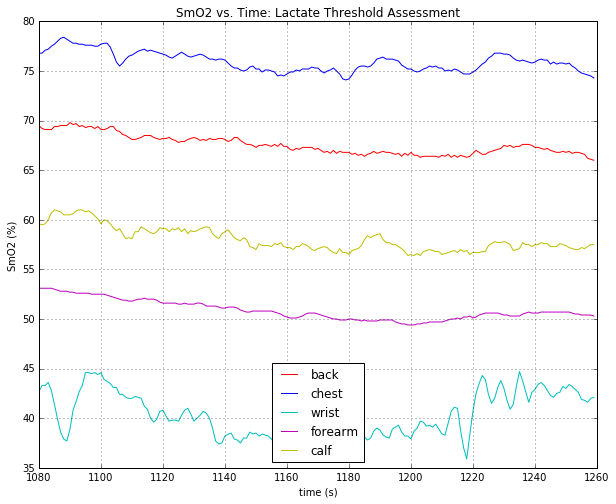

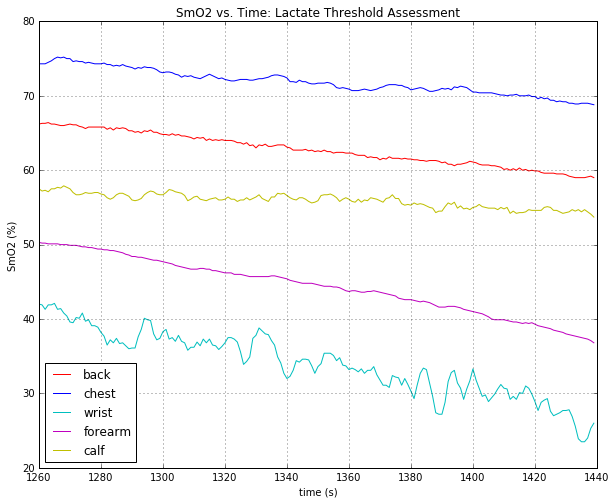

In [15]:
chunk = 180
start = 0
end = chunk
while(end < 1600):
    plt.plot(back.SmO2[start:end], 'r-', label='back')
    plt.plot(chest.SmO2[start:end], 'b-', label='chest')
    plt.plot(left_wrist.SmO2[start:end], 'c-', label='wrist')
    plt.plot(right_forearm.SmO2[start:end], 'm-', label='forearm')
    plt.plot(left_calf.SmO2[start:end], 'y-', label='calf')
    plt.ylabel('SmO2 (%)')
    plt.xlabel('time (s)')
    plt.title('SmO2 vs. Time: Lactate Threshold Assessment')
    plt.grid()
    plt.rcParams['figure.figsize'] = 10, 8
    plt.rcParams['legend.loc'] = 'best'
    plt.legend()
    plt.show()
    start = end
    end += chunk
